# Supervised Machine Learning- Classification based problem Statement.
How do you work through a predictive modeling- Classification based Machine learning problem end-to-end? 
In this jupyter note you will work through a case study classication predictive modeling problem in Python
including each step of the applied machine learning process. 
After completing this project, you will know:

- How to work through a classication predictive modeling problem end-to-end.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.


## Table of content
- [Load Libraries and Dataset](#HL1)
- [Analyze data](#H2)
- [Visualise Data](#H3)
- [Evaluate Algorithm](#H4)
- [Standardise Data](#H5)
- [Model Tuning and Grid Search](#H6)
- [Ensembles](#H7)
- [Final Estimation and Prediction](#H8)

Let's get started.


<H1 id='HL1'>Load Libraries and Dataset</H1>

In [176]:
# Load libraries
import numpy as np
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [177]:
# load dataset
dataset = read_csv('sonar.all-data.csv', header=None)

In [178]:
import warnings
warnings.filterwarnings('ignore')

<H1 id='H2'>Analyze data</H1>

In [179]:
# shape
dataset.shape

(208, 61)

In [180]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [181]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


In [182]:
# describe data
set_option('precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [183]:
# class distribution
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

<H1 id='H3'> Visualise data</H1>

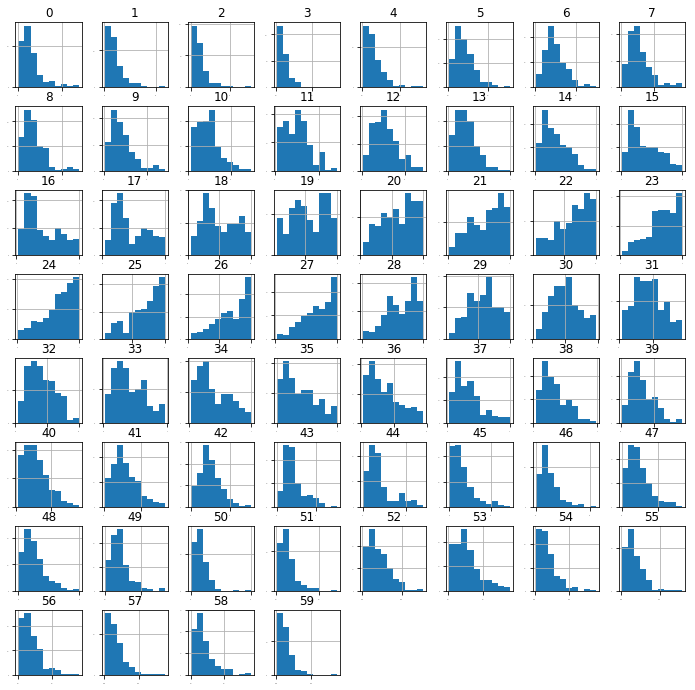

In [184]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

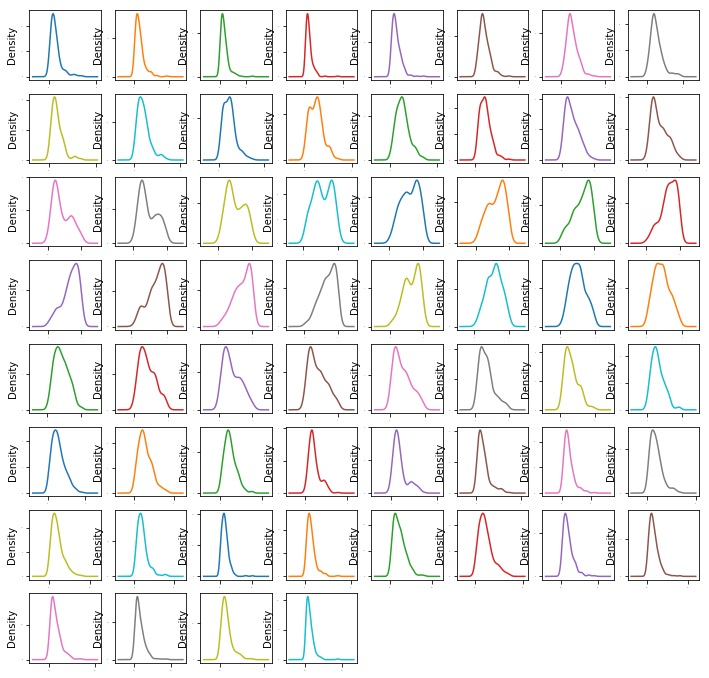

In [185]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

In [186]:
# box and whisker
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1)
#pyplot.show()

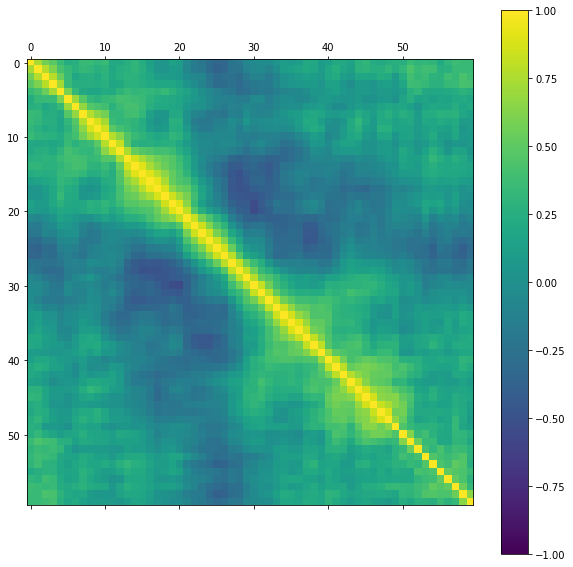

In [187]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
pyplot.show()

<H1 id='H4'> Evaluate Algorithms</H1>


In [188]:
# split out validation dataset for the end
array = dataset.values
X = array[:,0:-1].astype(float)
Y = array[:,-1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### Enable Deep Learning Models

In [189]:
#Set the following Flag to 1 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1

#### Test Options and Test Criteria

In [190]:
# test options

num_folds = 10
seed = 7
scoring = 'accuracy'

#### Initialise the models

In [191]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

#Neural Network
models.append(('NN', MLPClassifier()))

In [192]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.717647 (0.078659)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)
AB: 0.819853 (0.058293)
GBM: 0.853676 (0.100318)
RF: 0.770221 (0.082344)
ET: 0.812868 (0.122183)
NN: 0.836397 (0.074320)


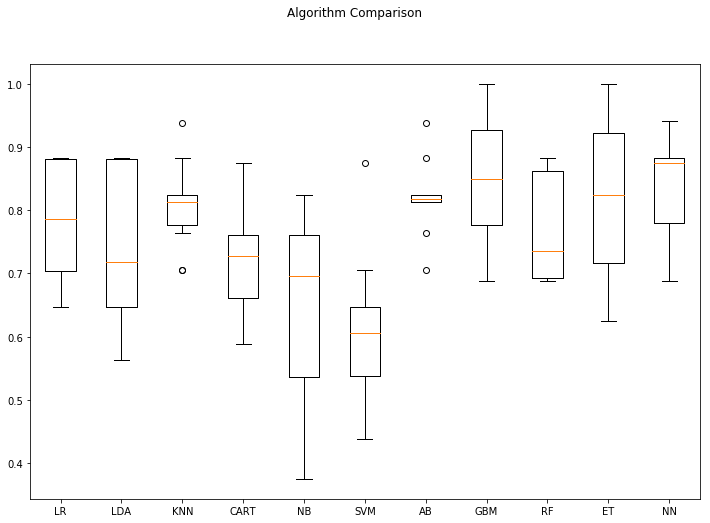

In [193]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
pyplot.show()

Right now LR, KNN, GBM and NN are proving the best with accuracy models. (But what about variance? KNN seemed to indicate a tighter variance during spot checking).

Let's try data standardization on data this time. Because apparantly all four ensembles we are using are based on decision trees and thus are less sensitive to data distributions. (Ok. Nice tip!)

<H1 id='H5'> Data Standardisation and impact on the results </H1>

In [194]:
# standardized the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('CART', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', StandardScaler()), ('NN', MLPClassifier())])))

In [195]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.754044 (0.088716)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)
ScaledAB: 0.819853 (0.058293)
ScaledGBM: 0.847794 (0.113949)
ScaledRF: 0.752941 (0.071683)
ScaledET: 0.769853 (0.110920)
ScaledNN: 0.841176 (0.109480)


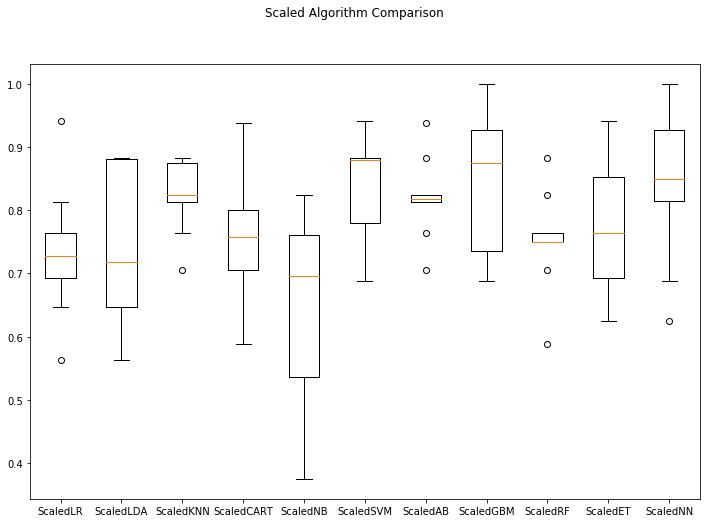

In [196]:
# compare scaled algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
pyplot.show()

With data standardisation there is a significant improvement in the Non-Ensamble models,apparantly all four ensembles we are using are based on decision trees and thus are less sensitive to data distributions. (Ok. Nice tip!)

<H1 id='H6'> Model Tuning - Grid Search </H1>

Algorithm Tuning: Although some of the models show the most promising options. the grid search for all the methods are shown below.

In [197]:
# 1. Grid search : Logistic Regression Algorithm 
'''
penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

C : float, optional (default=1.0)
Inverse of regularization strength; must be a positive float.Smaller values specify stronger regularization.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
C= np.logspace(-3,3,7)
penalty = ["l1","l2"]# l1 lasso l2 ridge
param_grid = dict(C=C,penalty=penalty )
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.801205 using {'C': 0.1, 'penalty': 'l2'}
#13 0.506024 (0.116457) with: {'C': 0.001, 'penalty': 'l1'}
#12 0.710843 (0.056819) with: {'C': 0.001, 'penalty': 'l2'}
#13 0.506024 (0.116457) with: {'C': 0.01, 'penalty': 'l1'}
#2 0.789157 (0.060225) with: {'C': 0.01, 'penalty': 'l2'}
#11 0.722892 (0.074532) with: {'C': 0.1, 'penalty': 'l1'}
#1 0.801205 (0.069264) with: {'C': 0.1, 'penalty': 'l2'}
#6 0.753012 (0.103597) with: {'C': 1.0, 'penalty': 'l1'}
#10 0.740964 (0.098527) with: {'C': 1.0, 'penalty': 'l2'}
#4 0.765060 (0.109538) with: {'C': 10.0, 'penalty': 'l1'}
#3 0.777108 (0.085726) with: {'C': 10.0, 'penalty': 'l2'}
#6 0.753012 (0.102198) with: {'C': 100.0, 'penalty': 'l1'}
#6 0.753012 (0.103383) with: {'C': 100.0, 'penalty': 'l2'}
#6 0.753012 (0.111326) with: {'C': 1000.0, 'penalty': 'l1'}
#5 0.759036 (0.097396) with: {'C': 1000.0, 'penalty': 'l2'}


In [198]:
# Grid Search : LDA Algorithm 
'''
n_components : int, optional (default=None)
Number of components for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
components  = [1,3,5,7,9,11,13,15,17,19,600]
param_grid = dict(n_components=components)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.746988 using {'n_components': 1}
#1 0.746988 (0.117896) with: {'n_components': 1}
#1 0.746988 (0.117896) with: {'n_components': 3}
#1 0.746988 (0.117896) with: {'n_components': 5}
#1 0.746988 (0.117896) with: {'n_components': 7}
#1 0.746988 (0.117896) with: {'n_components': 9}
#1 0.746988 (0.117896) with: {'n_components': 11}
#1 0.746988 (0.117896) with: {'n_components': 13}
#1 0.746988 (0.117896) with: {'n_components': 15}
#1 0.746988 (0.117896) with: {'n_components': 17}
#1 0.746988 (0.117896) with: {'n_components': 19}
#1 0.746988 (0.117896) with: {'n_components': 600}


In [199]:
# Grid Search KNN algorithm tuning
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for kneighbors queries.

weights : str or callable, optional (default = ‘uniform’)
    weight function used in prediction. Possible values: ‘uniform’, ‘distance’

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights = weights )
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1, 'weights': 'uniform'}
#1 0.849398 (0.059881) with: {'n_neighbors': 1, 'weights': 'uniform'}
#1 0.849398 (0.059881) with: {'n_neighbors': 1, 'weights': 'distance'}
#4 0.837349 (0.066303) with: {'n_neighbors': 3, 'weights': 'uniform'}
#4 0.837349 (0.066303) with: {'n_neighbors': 3, 'weights': 'distance'}
#4 0.837349 (0.037500) with: {'n_neighbors': 5, 'weights': 'uniform'}
#3 0.843373 (0.039469) with: {'n_neighbors': 5, 'weights': 'distance'}
#9 0.765060 (0.089510) with: {'n_neighbors': 7, 'weights': 'uniform'}
#7 0.807229 (0.071079) with: {'n_neighbors': 7, 'weights': 'distance'}
#13 0.753012 (0.086979) with: {'n_neighbors': 9, 'weights': 'uniform'}
#11 0.759036 (0.088709) with: {'n_neighbors': 9, 'weights': 'distance'}
#16 0.734940 (0.104890) with: {'n_neighbors': 11, 'weights': 'uniform'}
#11 0.759036 (0.107245) with: {'n_neighbors': 11, 'weights': 'distance'}
#16 0.734940 (0.105836) with: {'n_neighbors': 13, 'weights': 'uniform'}
#9 0.765060 (0

In [200]:
# Grid Search : CART Algorithm 
'''
max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
    or until all leaves contain less than min_samples_split samples.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = np.arange(2, 30)
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.765060 using {'max_depth': 11}
#28 0.584337 (0.089397) with: {'max_depth': 2}
#27 0.668675 (0.114734) with: {'max_depth': 3}
#18 0.716867 (0.089963) with: {'max_depth': 4}
#14 0.722892 (0.085467) with: {'max_depth': 5}
#11 0.728916 (0.108743) with: {'max_depth': 6}
#14 0.722892 (0.086498) with: {'max_depth': 7}
#18 0.716867 (0.112005) with: {'max_depth': 8}
#25 0.692771 (0.088184) with: {'max_depth': 9}
#2 0.759036 (0.104420) with: {'max_depth': 10}
#1 0.765060 (0.101018) with: {'max_depth': 11}
#5 0.740964 (0.106623) with: {'max_depth': 12}
#11 0.728916 (0.084700) with: {'max_depth': 13}
#2 0.759036 (0.060691) with: {'max_depth': 14}
#10 0.734940 (0.106254) with: {'max_depth': 15}
#5 0.740964 (0.112190) with: {'max_depth': 16}
#18 0.716867 (0.099769) with: {'max_depth': 17}
#14 0.722892 (0.097226) with: {'max_depth': 18}
#11 0.728916 (0.101801) with: {'max_depth': 19}
#5 0.740964 (0.105789) with: {'max_depth': 20}
#21 0.710843 (0.098015) with: {'max_depth': 21}
#26 0.680723 (0

In [201]:
# Grid Search : NB algorithm tuning
#GaussianNB only accepts priors as an argument so unless you have some priors to set for your model ahead of time 
#you will have nothing to grid search over.


In [202]:
# Grid Search: SVM algorithm tuning
'''
C : float, optional (default=1.0)
Penalty parameter C of the error term.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. 
It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
Parameters of SVM are C and kernel. 
Try a number of kernels with various values of C with less bias and more bias (less than and greater than 1.0 respectively
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
kernel_values = ['linear', 'poly', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
#13 0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
#24 0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
#23 0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
#17 0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
#22 0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
#12 0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
#19 0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
#21 0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
#8 0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
#17 0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
#19 0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
#7 0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
#13 0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'}
#10 0.771084 (0.102127) with: {'C': 0.9, 'kernel': 'poly'}
#3 0.837349 (0.087854) with: {'C': 0.9, 'kernel': 'rbf'}
#16 0.753012 (0.099230) with: {'C': 1.0, 'kernel': 'linear'}
#8 

In [172]:
# Grid Search: Ada boost Algorithm Tuning 
'''
n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated. 
    In case of perfect fit, the learning procedure is stopped early.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [10, 100]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.819277 using {'n_estimators': 100}
#2 0.771084 (0.097920) with: {'n_estimators': 10}
#1 0.819277 (0.054741) with: {'n_estimators': 100}


In [218]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,180]
max_depth= [3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.855422 using {'max_depth': 3, 'n_estimators': 180}
#2 0.777108 (0.107709) with: {'max_depth': 3, 'n_estimators': 20}
#1 0.855422 (0.110988) with: {'max_depth': 3, 'n_estimators': 180}
#3 0.746988 (0.103811) with: {'max_depth': 5, 'n_estimators': 20}
#3 0.746988 (0.107170) with: {'max_depth': 5, 'n_estimators': 180}


In [211]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.849398 using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#1 0.849398 (0.057619) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#3 0.819277 (0.077515) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#7 0.765060 (0.086873) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#5 0.807229 (0.070923) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.759036 (0.079770) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#4 0.813253 (0.115884) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#6 0.789157 (0.107601) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.849398 (0.088533) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [212]:
# Grid Search: ExtraTreesClassifier()
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.873494 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.813253 (0.087583) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#6 0.819277 (0.067758) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.825301 (0.095289) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#1 0.873494 (0.098198) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#6 0.819277 (0.068409) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#4 0.825301 (0.085098) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#3 0.843373 (0.111599) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.873494 (0.083578) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [213]:
# Grid Search : NN algorithm tuning
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith hidden layer.
Other Parameters that can be tuned
    learning_rate_init : double, optional, default 0.001
        The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
    max_iter : int, optional, default 200
        Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
hidden_layer_sizes= [(20,), (50,), (20,20), (20, 30, 20)]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.825301 using {'hidden_layer_sizes': (20, 30, 20)}
#3 0.807229 (0.081528) with: {'hidden_layer_sizes': (20,)}
#4 0.801205 (0.084397) with: {'hidden_layer_sizes': (50,)}
#2 0.819277 (0.107656) with: {'hidden_layer_sizes': (20, 20)}
#1 0.825301 (0.117556) with: {'hidden_layer_sizes': (20, 30, 20)}


<H1 id='H8'> Final Estimation and Prediction </H1>

Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.

Finalize Model with best parameters found during tuning step.

In [214]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX, Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [215]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

   micro avg       0.86      0.86      0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



The accuracy on the validation set was 85.7%. Very close to our original estimates.

In [48]:
predictions

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)

In [49]:
Y_validation

array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)